# Desafío 01-07

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo

__Contexto__

* En esta actividad trabajaremos con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv `Credit` contiene las siguientes variables:

* `Income`: Ingreso anual disponible en miles de dólares.
* `Limit`: Límite del crédito.
* `Rating`: Ranking del crédito.
* `Cards`: Cantidad de tarjetas de credito.
* `Age`: Edad del usuario.
* `Education`: Años de educación del usuario.
* `Gender`: ¿Hombre o mujer?
* `Student`: ¿Es estudiante?
* `Married`: ¿Está casado?
* `Ethnicity`: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* `Balance`: Promedio de deuda en tarjeta de crédito de usuario.

* Para efectos prácticos del ejercicio, nos interesa saber sobre los determinantes de la variación en el promedio de deuda en tarjeta de crédito. A lo largo del ejercicio generaremos modelos econométricos para inspeccionar los efectos de distintos atributos.

## Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de `statsmodels`.
* Importe la base de datos `Credit.csv` y elimine la columna `Unnamed: 0`.
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de `Ethnicity`, genere binarias para `AfricanAmerican` y `Asian`.
    - _tip_: Utilice `value_counts()` para revisar la cantidad de casos en las variables categóricas.
   

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as stm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from seaborn import distplot

df = pd.read_csv("Credit.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df['Gender_binarize'] = np.where(df['Gender'] == ' Male', 1, 0)
df['Student_binarize'] = np.where(df['Student'] == 'Yes', 1, 0)
df['Married_binarize'] = np.where(df['Married'] == 'Yes', 1, 0)
df['AfricanAmerican_binarize'] = np.where(df['Ethnicity'] == 'African American', 1, 0)
df['Asian_binarize'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_binarize,Student_binarize,Married_binarize,AfricanAmerican_binarize,Asian_binarize
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,1,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,1,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,0,0,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,0,0,0,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,1,0,0
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151,1,0,0,0,0
6,20.996,3388,259,2,37,12,Female,No,No,African American,203,0,0,0,1,0
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872,1,0,0,0,1
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279,0,0,0,0,0
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350,0,1,1,1,0


## Genere gráficos descriptivos para las variables contínuas

* Genere una función llamada `plot_hist` que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
* ¿Cuál es el comportamiento de `Balance`, `Income`, `Cards` y `Rating`? 

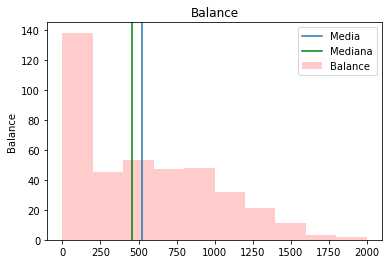

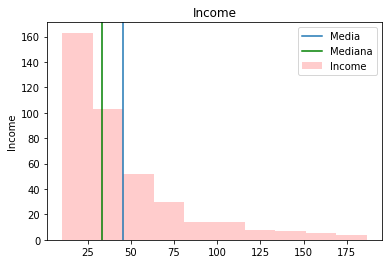

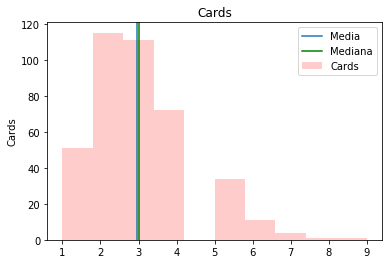

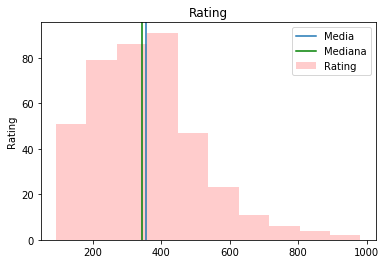

In [3]:
def plot_hist(dataframe,variable):
    grupo_1 = dataframe[variable].dropna()
    dato = dataframe[variable].dropna()
    
    plt.figure()
    plt.hist(grupo_1, alpha=.2, color='red', label= variable)
    plt.axvline(np.mean(grupo_1), label ="Media")
    plt.axvline(np.median(grupo_1), label = "Mediana", color ="green")
    plt.gca().set(title= variable, ylabel= variable)
    plt.legend()
    
plot_hist(df,"Balance")
plot_hist(df,"Income")
plot_hist(df,"Cards")
plot_hist(df,"Rating")

## Regresión Lineal Simple

* A continuación generaremos una serie de modelos simples:
    - $Balance = \beta_0  + \beta_1*Student + \epsilon$
    - $Balance = \beta_0 + \beta_1*Income + \epsilon$
    - $Balance = \beta_0 + \beta_1*Rating + e$
* Utilizando `statsmodels`, comente brevemente los siguientes puntos:
    - ¿Qué variable presenta un mayor poder explicativo de la variabilidad de `Balance`? 
    __Resp: Por revisar: Rating es la variable que mas explica la variable dependiente con un R-cuadrado de 74.6\%__
    - ¿Qué podemos decir sobre el comportamiento de `Student`? __Resp:  Podemos decir que en la variable binarizada de student, ser estudiante, aumenta en  396.4556 unidades la deuda con respecto a alguien que no lo es__
    - ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de `Balance` entre aquellos que son y no son estudiantes?__Resp: Se puede concluir al planear un test de hipotesis para muestras independientes que la deuda de los estudiantes con respecto a los que no lo son es significativamente distinta__


In [4]:
model1 = smf.ols('Balance ~ Student_binarize', data = df)
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        21:18:45   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          480.3694     23.434     20.499      0.000     434.300     526.439
Student_binarize   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
model2 = smf.ols('Balance ~ Income', data = df)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           1.03e-22
Time:                        21:18:48   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
model3 = smf.ols('Balance ~ Rating', data = df)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          1.90e-120
Time:                        21:18:51   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Genere un modelo que incluya todos los regresores

$$Balance_i=\beta_0 + \sum_{j=1}^N \beta_j X_{ij} +\epsilon_i$$

- Comente brevemente sobre el poder explicativo en la varianza de $y$ las principales características de los predictores.


__Resp: 
Los coeficientes Income , Limit, Rating, Cards, Age, binarize_Student son las que más afectan la varianza de $y$.__

In [12]:
model4= smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender_binarize + Student_binarize + Married_binarize + AfricanAmerican_binarize + Asian_binarize ', data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          1.11e-253
Time:                        21:47:39   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -479.7541     34.717    -13.819      0.000    -548.012    -411.497
Income                      -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                        0.1909      0.033      5.824      0.000       0.126       0.255
Rating                       1.1365      0.491      2.315      0.021       0.171       2.102
Cards                       17.7245      4.341      4.083      0.000       9.190      26.259
Age                         -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                   -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender_binarize             10.6532      9.914      1.075      0.283      -8.839      30.145
Student_binarize           425.7474     16.723     25.459      0.000     392.869     458.626
Married_binarize            -8.5339     10.363     -0.824      0.411     -28.908      11.841
AfricanAmerican_binarize   -10.1070     12.210     -0.828      0.408     -34.113      13.899
Asian_binarize               6.6972     12.122      0.552      0.581     -17.137      30.531
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Depure el modelo e incluya sólo los predictores significativo¶

En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia  $p-value\leq.025$. Comente brevemente sobre el poder explicativo en la varianza de $y$ y las principales características de los predictores.
¿Mejoró o empeoró el modelo con la reducción de regresores?

In [8]:
model5= smf.ols('Balance ~ Income + Limit + Rating + Cards + Student_binarize', data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):          3.60e-261
Time:                        21:44:22   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income              -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit                0.1944      0.033      5.977      0.000       0.130       0.258
Rating               1.0879      0.487      2.234      0.026       0.130       2.045
Cards               17.8517      4.335      4.118      0.000       9.329      26.374
Student_binarize   426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se puede concluir el modelo que mejor se ajusta es el último, con un AIC menor que en los otros modelos 
el cual es significativo, ya que al menos un $$\widehat\beta_{i}\neq 0$$ . Las variables mas significativas son:

$$\widehat\beta_{Cards}=17.8517$$
$$\widehat\beta_{Student\_binarize}=426.85$$
$$\widehat\beta_{Income}=-7.8749$$

Con un $$R-cuadrado_{Ajustado}=95.4\%$$ que significa que el modelo explica el $$95.4\%$$ de la variabilidad y residuos de 394, lo que es menor a los modelos anteriores.

## Desafío 6:
Utilizando lmplot de seaborn, inspeccione el comportamiento de los tres principales determinantes. 
__Resp: Se puede concluir que Income presenta una relacion lineal con respecto a Balance__

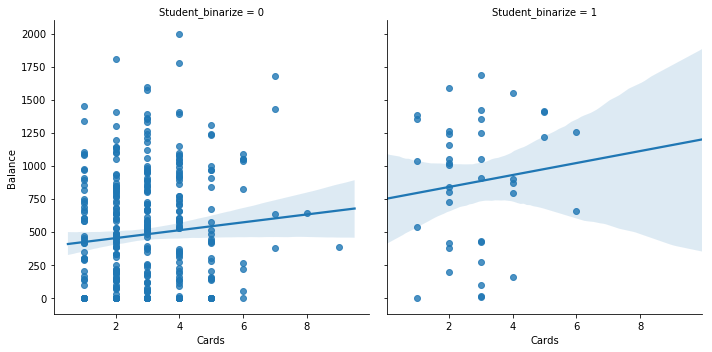

In [36]:
g = sns.lmplot(x="Cards", y="Balance",col= "Student_binarize", data = df)

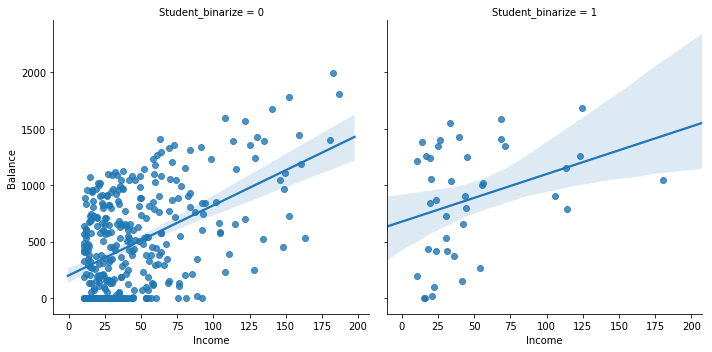

In [30]:
t = sns.lmplot(x="Income", y="Balance",col= "Student_binarize", data = df)

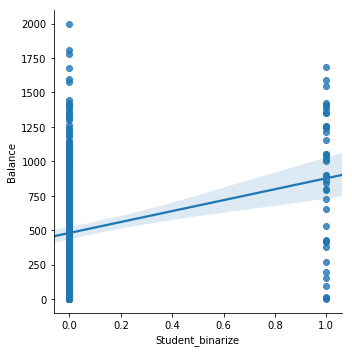

In [35]:
t = sns.lmplot(x="Student_binarize", y="Balance", data = df)